<a href="https://colab.research.google.com/github/brnocorreia/HTRU-machinelearning/blob/main/HTRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

from joblib import Parallel, delayed
import multiprocessing as mp

In [63]:
data = pd.read_csv('/content/HTRU_2.csv')
data

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [64]:
data.columns = ['Mean IP', 'Standard Deviation IP', 'Excess Kurtosis IP', 'Skewness IP', 'Mean Curve','Standard Deviation Curve','Excess Kurtosis Curve', 'Skewness Curve', 'Diagnosis']
data

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Diagnosis
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


<Axes: ylabel='Frequency'>

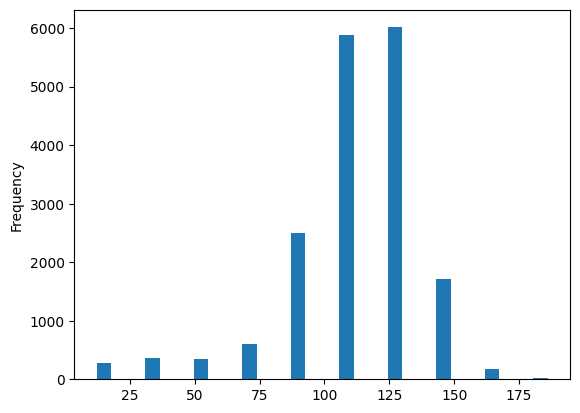

In [65]:
data['Mean IP'].plot.hist(rwidth=0.3)


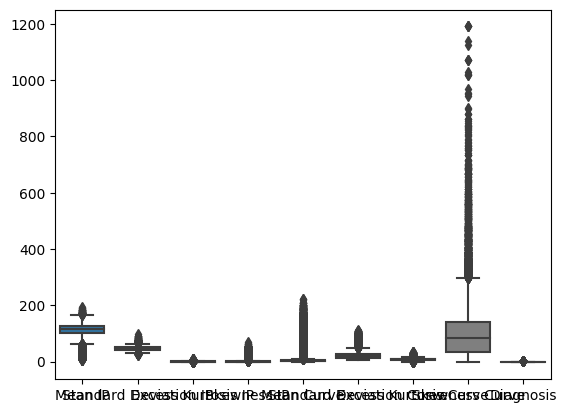

In [66]:
ax = sns.boxplot(data = data)

In [67]:
obj_normalizado = MinMaxScaler().fit(data)

In [68]:
data_norm = obj_normalizado.transform(data)

In [69]:
data_norm

array([[0.51762787, 0.46090841, 0.23541516, ..., 0.36401483, 0.10844339,
        0.        ],
       [0.52034628, 0.19686832, 0.22113842, ..., 0.28862387, 0.05461031,
        0.        ],
       [0.70093263, 0.43788377, 0.18174959, ..., 0.26634832, 0.04658145,
        0.        ],
       ...,
       [0.60771193, 0.4751437 , 0.2046521 , ..., 0.14965285, 0.00550903,
        0.        ],
       [0.58186609, 0.39361695, 0.20885482, ..., 0.34892638, 0.11418141,
        0.        ],
       [0.27435072, 0.82458965, 0.33003783, ..., 0.04091771, 0.00285542,
        0.        ]])

In [70]:
data_norm = pd.DataFrame(data_norm)

data_norm.columns = ['Mean IP', 'Standard Deviation IP', 'Excess Kurtosis IP', 'Skewness IP', 'Mean Curve','Standard Deviation Curve','Excess Kurtosis Curve', 'Skewness Curve', 'Class']

data_norm.head()

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Class
0,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0.0
1,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0.0
2,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0.0
3,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0.0
4,0.469784,0.296271,0.242110,0.031600,0.006376,0.069473,0.365216,0.111797,0.0


In [71]:
data_norm.describe()

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,0.563507,0.294256,0.236680,0.050968,0.055568,0.183559,0.303692,0.089554,0.09158
std,0.137324,0.092465,0.106988,0.088249,0.132063,0.188542,0.119595,0.089287,0.28844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.509180,0.237861,0.191354,0.022940,0.007661,0.068430,0.236756,0.030960,0.00000
50%,0.584919,0.299626,0.211075,0.028481,0.011599,0.107382,0.307150,0.071289,0.00000
75%,0.649199,0.354708,0.236223,0.038918,0.023531,0.203906,0.367372,0.118433,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


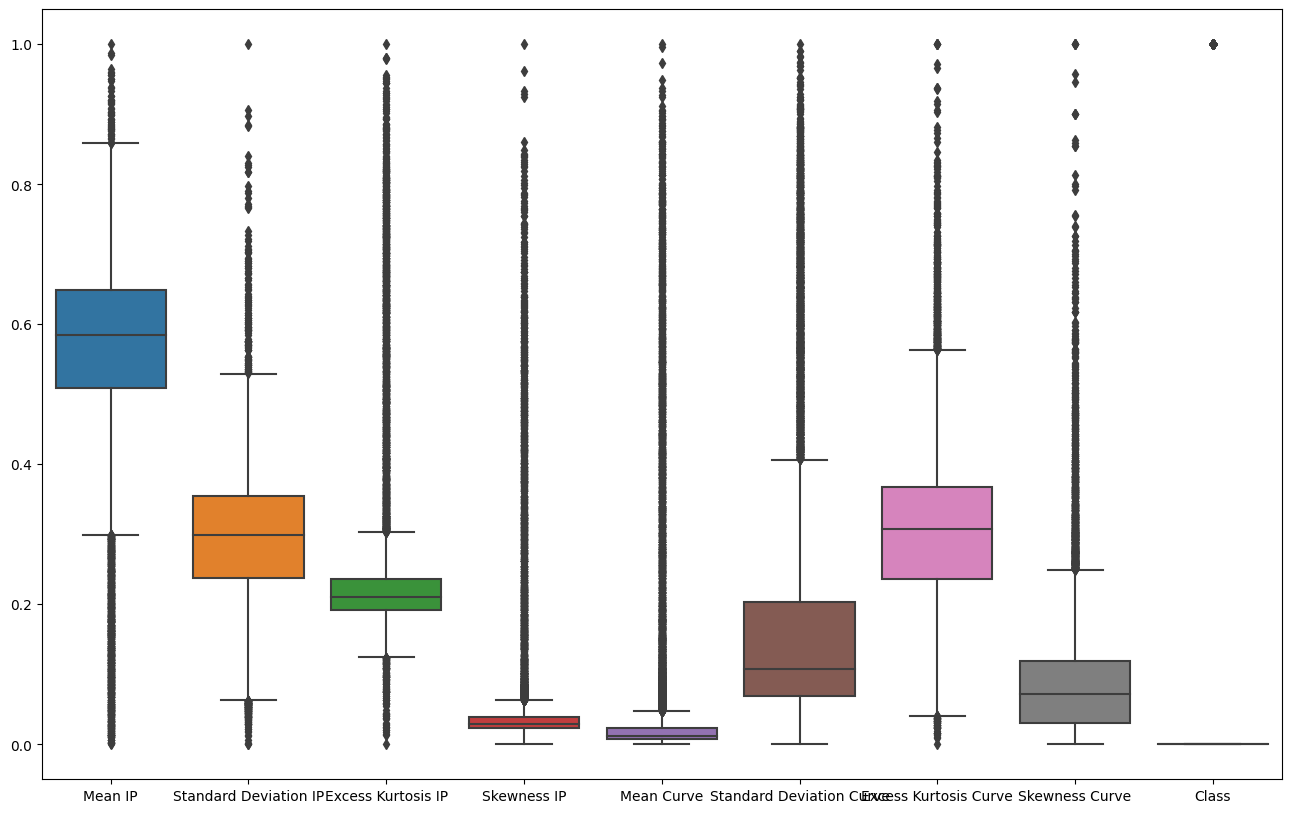

In [72]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(data = data_norm)

In [73]:
y = data_norm['Class']
data_norm = data_norm.drop(['Class'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(data_norm, y, test_size=0.2)

In [74]:
clf = KNeighborsClassifier(n_neighbors = 4)

In [75]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
np.mean(scores)

0.9771598286362121

In [76]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [77]:
y_pred = clf.predict(X_test)

In [78]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,3206,11,3217
1.0,71,292,363
All,3277,303,3580


In [79]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9321249182659714

In [80]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.9710151057827785